In [1]:
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from warnings import filterwarnings
filterwarnings('ignore')

### Granger Causality Analysis:

Whether past values of one variable help predict the current value of another variable.

In [2]:
#build the time series, just a simple AR(1)
t1 = [0.1*np.random.normal()]
for _ in range(100):
    t1.append(0.5*t1[-1] + 0.1*np.random.normal())

In [3]:
# build the time series that is granger caused by t1
t2 = [item + 0.1*np.random.normal() for item in t1]

In [4]:
#adjust t1 and t2
t1 = t1[3:]
t2 = t2[:-3]

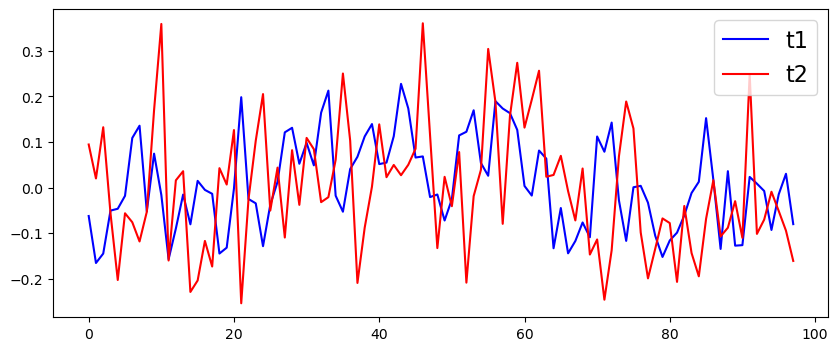

In [5]:
# t1 and t2 is adjusted such that t2 is roughly a shifted version of t1 by lag 3
plt.figure(figsize=(10,4))
plt.plot(t1, color='b')
plt.plot(t2, color='r')

plt.legend(['t1', 't2'], fontsize=16)

In [6]:
ts_df = pd.DataFrame(columns=['t2', 't1'], data=zip(t2,t1))

In [7]:
ts_df

,t2,t1
0,0.094364,-0.062327
1,0.019932,-0.165320
2,0.132183,-0.144694
3,-0.056241,-0.050471
4,-0.202561,-0.046462
...,...,...
93,-0.070192,-0.007504
94,-0.009201,-0.092942
95,-0.051324,-0.014892
96,-0.094527,0.030172


In [8]:
gc_res = grangercausalitytests(ts_df, 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4445  , p=0.2324  , df_denom=94, df_num=1
ssr based chi2 test:   chi2=1.4906  , p=0.2221  , df=1
likelihood ratio test: chi2=1.4793  , p=0.2239  , df=1
parameter F test:         F=1.4445  , p=0.2324  , df_denom=94, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=11.2607 , p=0.0000  , df_denom=91, df_num=2
ssr based chi2 test:   chi2=23.7588 , p=0.0000  , df=2
likelihood ratio test: chi2=21.2286 , p=0.0000  , df=2
parameter F test:         F=11.2607 , p=0.0000  , df_denom=91, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=35.7608 , p=0.0000  , df_denom=88, df_num=3
ssr based chi2 test:   chi2=115.8162, p=0.0000  , df=3
likelihood ratio test: chi2=75.7254 , p=0.0000  , df=3
parameter F test:         F=35.7608 , p=0.0000  , df_denom=88, df_num=3


In [9]:
# at lag =3 we can see that p-value is less than 0.05, so we can say that their is granger casuality present
# between t2 and t1 at lag= 3

# Anomaly detection for CatFish Dataset

In [10]:
def parser(s):
    return dt.strptime(s,'%Y-%m-%d')

In [11]:
catfish_sales= pd.read_csv(r"D:\Datasets\catfish.csv", parse_dates= [0], date_parser= parser, index_col=[0])

In [12]:
#infer the frequency of the data
catfish_sales = catfish_sales.asfreq(pd.infer_freq(catfish_sales.index))

In [13]:
start_date = dt(1996,1,1)
end_date = dt(2000,1,1)
lim_catfish_sales = catfish_sales[start_date:end_date]

In [14]:
lim_catfish_sales

,Total
Date,
1996-01-01,20322
1996-02-01,20613
1996-03-01,22704
1996-04-01,20276
1996-05-01,20669
1996-06-01,18074
1996-07-01,18719
1996-08-01,20217
1996-09-01,19642


In [15]:
#At December 1 1998
lim_catfish_sales.loc[dt(1998,12,1)] =10000

In [16]:
lim_catfish_sales

,Total
Date,
1996-01-01,20322
1996-02-01,20613
1996-03-01,22704
1996-04-01,20276
1996-05-01,20669
1996-06-01,18074
1996-07-01,18719
1996-08-01,20217
1996-09-01,19642


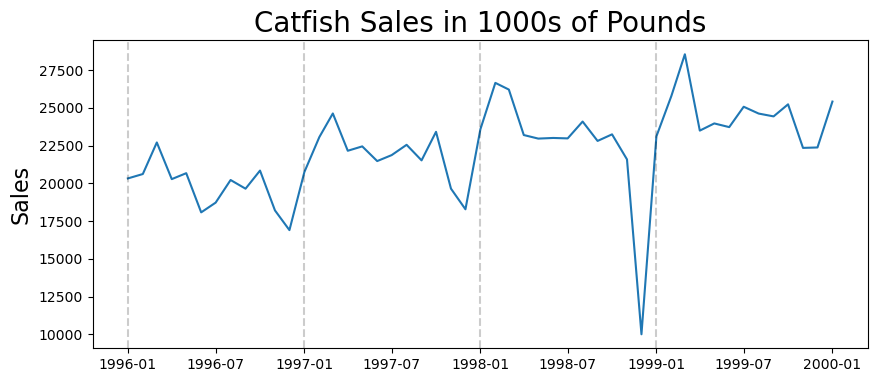

In [17]:
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [18]:
# Remove Trend

first_diff = lim_catfish_sales.diff()[1:]

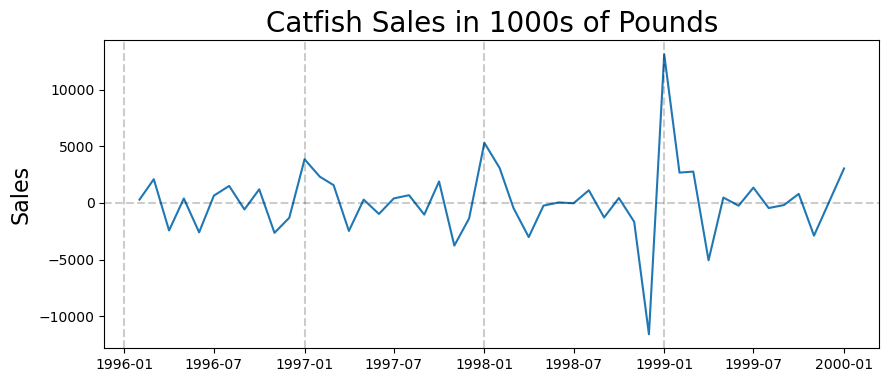

In [19]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

In [20]:
from datetime import timedelta

# Get training and testing sets
train_end = dt(1999,7,1)
test_end = dt(2000,1,1)

test_data = lim_catfish_sales[train_end + timedelta(days=1):test_end]

### Attempt 1: Deviation Method

we will be taking a window of particular size take the std of that, store it and then extend the window again with same size(extend in the sense, if 1st window was size 1 then the 2nd window will be size 1+1=2, which will cover data points from window 1 and new data point from remaining window of size 1) calcu the std and save it again.

Drawback, as we are taking the std and 1st diff the datapoint at start will have nan values, and bcoz of droping that we might drop some imp info... as its not always necessary that anamoly will be in between or at the end of the data, it can be at the start of the data

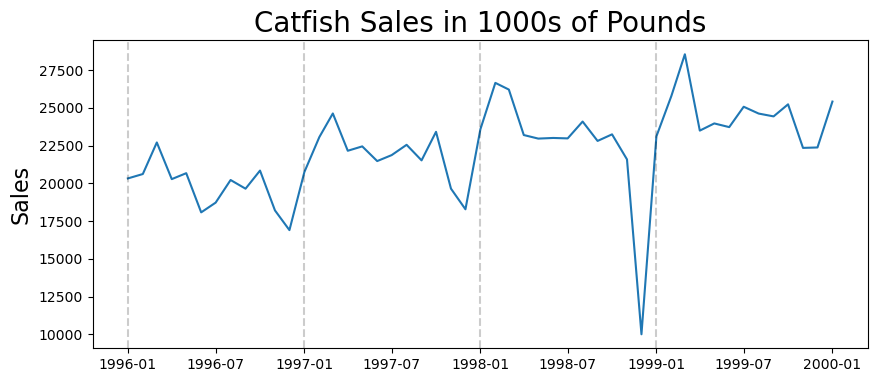

In [22]:
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [94]:
rolling_deviations = pd.Series(lim_catfish_sales['Total'], index= lim_catfish_sales.index)

In [95]:
rolling_deviations.loc['1996-03-01 ']

22704

In [98]:
window= lim_catfish_sales.loc[:'1996-03-01 ']
rol=rolling_deviations.loc['1996-03-01 ']

print(window.std()[0])

rolling_deviations.loc['1996-03-01 '] = window.std()[0]
rolling_deviations.loc['1996-03-01 ']

1299.4156378926643


1299.4156378926643

In [ ]:
rolling_deviations.loc['1996-01-01 ']= window['Total'].std()
rolling_deviations.loc['1996-01-01 ']

In [102]:
for date in rolling_deviations.index:
    # get the window at this data point
    window= lim_catfish_sales.loc[:date]

    # get the deviation till this data point
    rolling_deviations.loc[date]= window.std()[0]


In [100]:
#get the difference in deviation between one time point and the next
diff_rolling_deviations = rolling_deviations.diff()
diff_rolling_deviations = diff_rolling_deviations.dropna()

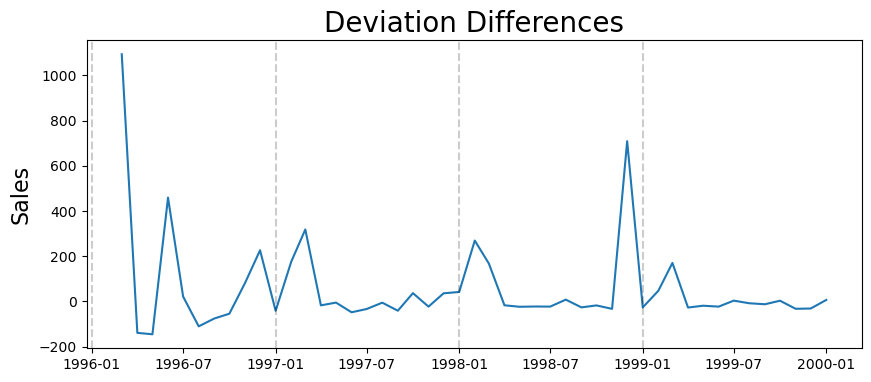

In [101]:
plt.figure(figsize=(10,4))
plt.plot(diff_rolling_deviations)
plt.title('Deviation Differences', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## Attempt 2: Seasonal Method

Looking a the std by month wise through all the years for ex. we will start looking at the std of 1996-1-1, 1997-1-1, 1998-1-1, 1999-1-1, 2000-1-1 ...similarly we will do for all other months

In [103]:
monthly_dev= lim_catfish_sales.groupby(lim_catfish_sales.index.month).std()

Text(0, 0.5, 'Sales')

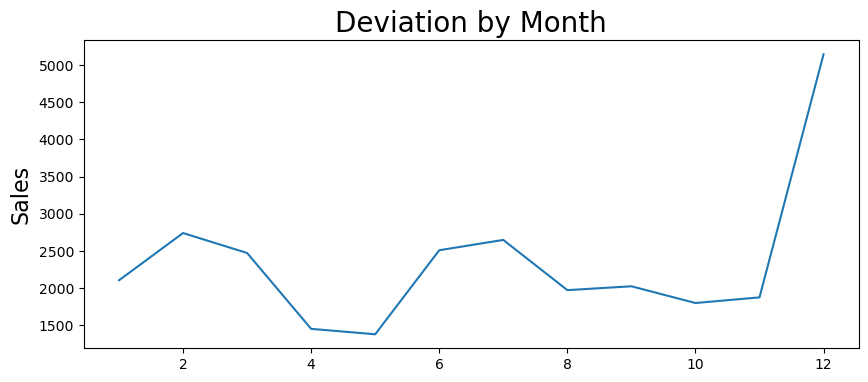

In [104]:
plt.figure(figsize=(10,4))
plt.plot(monthly_dev)
plt.title('Deviation by Month', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [ ]:
# So, the anomaly occurs in a December

In [107]:
dec_data= lim_catfish_sales[lim_catfish_sales.index.month==12]

In [108]:
dec_data

,Total
Date,
1996-12-01,16898
1997-12-01,18278
1998-12-01,10000
1999-12-01,22372


In [124]:
# Eliminate each december one by one and calculate the std for other three dec
min_dev= 9999999
curr_anamoly= None

for i in dec_data.index:
    other_date= dec_data[dec_data.index != i]
    
    curr_dev= other_date.std()
    
    if (curr_dev < min_dev).any():
        min_dev= curr_dev
        curr_anamoly= i

In [160]:
curr_anamoly

Timestamp('1998-12-01 00:00:00')

## What to do about the anomaly?

### Simple Idea: use mean of other months

In [149]:
 dec_data.index, (test_data.index[0])

(DatetimeIndex(['1996-12-01', '1997-12-01', '1998-12-01', '1999-12-01'], dtype='datetime64[ns]', name='Date', freq='12MS'),
 Timestamp('1999-08-01 00:00:00'))

In [162]:
adjusted_data = lim_catfish_sales.copy()
adjusted_data.loc[curr_anamoly] = dec_data[(dec_data.index != curr_anomaly) & (dec_data.index < test_data.index[0])].mean()


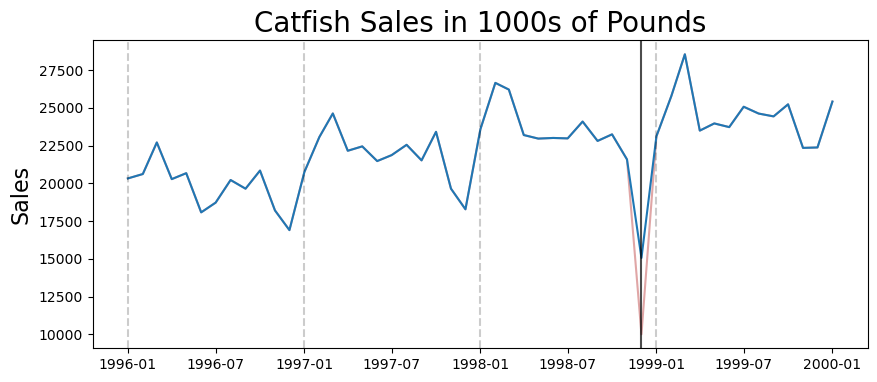

In [164]:
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales, color='firebrick', alpha=0.4)
plt.plot(adjusted_data)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
    
plt.axvline(curr_anamoly, color='k', alpha=0.7)

In [166]:
# Resulting Predictions

train_end = dt(1999,7,1)
test_end = dt(2000,1,1)

test_data = adjusted_data[train_end + timedelta(days=1):test_end]

In [268]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
rolling_predictions = test_data.copy()

for idx, train_end in enumerate(test_data.index):
    train_data = adjusted_data[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
#     print(rolling_predictions)
    rolling_predictions.loc[pred.index] = pred

In [222]:
# rolling_predictions[rolling_predictions.index=='1999-08-01'] =25821.518471

In [269]:
rolling_predictions

,Total
Date,
1999-08-01,25821.518471
1999-09-01,23962.122187
1999-10-01,25228.461729
1999-11-01,23285.889598
1999-12-01,20237.330977
2000-01-01,28433.872517


In [270]:
rolling_residuals = test_data['Total'] - rolling_predictions['Total']

Text(0, 0.5, 'Error')

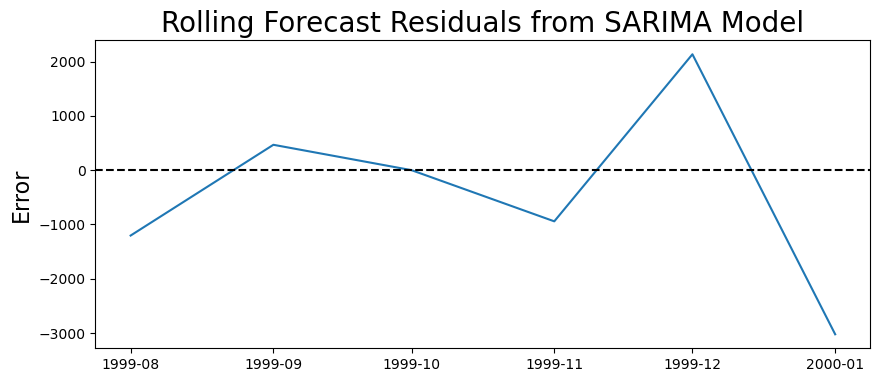

In [271]:
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

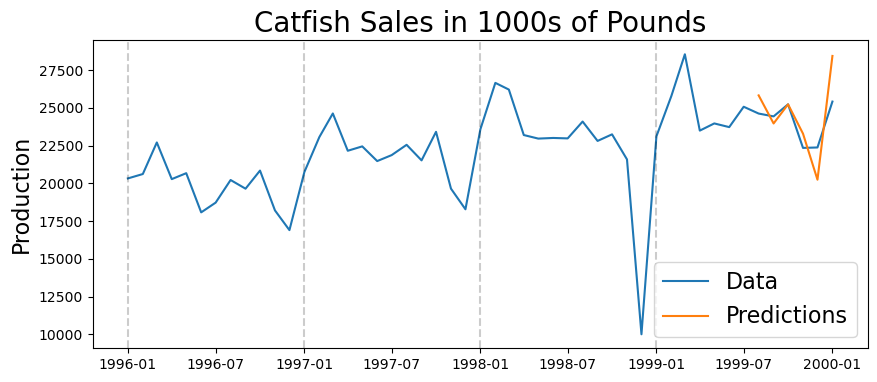

In [272]:
plt.figure(figsize=(10,4))

plt.plot(lim_catfish_sales)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [275]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data['Total'])),4))

Mean Absolute Percent Error: 0.0541


In [274]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Root Mean Squared Error: 1645.3494061045524


## Seasonal-Trend Decomposition using LOESS (STL)

Seasonal-Trend Decomposition using LOESS (STL) is a time series decomposition method used to separate a time series into three components: trend, seasonal, and remainder (or residual). It is a robust and flexible technique that can handle time series data with non-linear trends and complex seasonal patterns.

In [281]:
from statsmodels.tsa.seasonal import STL

In [283]:
stl = STL(lim_catfish_sales['Total'])
result = stl.fit()

In [284]:
seasonal, trend, resid = result.seasonal, result.trend, result.resid

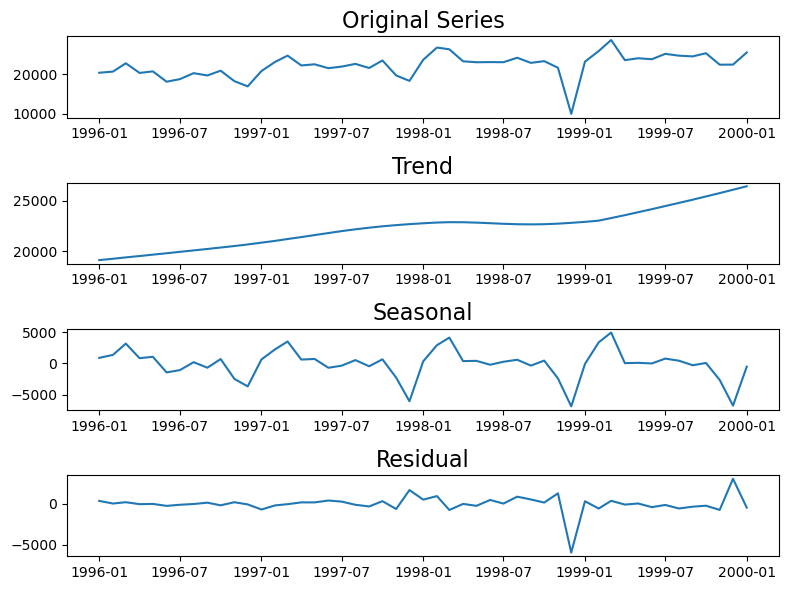

In [286]:
plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(lim_catfish_sales)
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

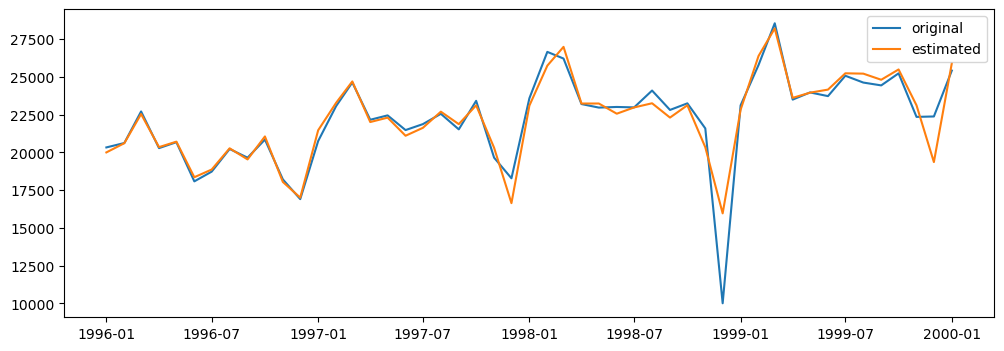

In [290]:
estimated= trend + seasonal 

plt.figure(figsize=(12,4))
plt.plot(lim_catfish_sales)
plt.plot(estimated)

plt.legend(['original', 'estimated'])

## Anamoly Detection

In [291]:
resid_mu= resid.mean()
resid_std= resid.std()

lower= resid_mu - 3*resid_std
upper= resid_mu + 3*resid_std

(9740.0, 10926.0)

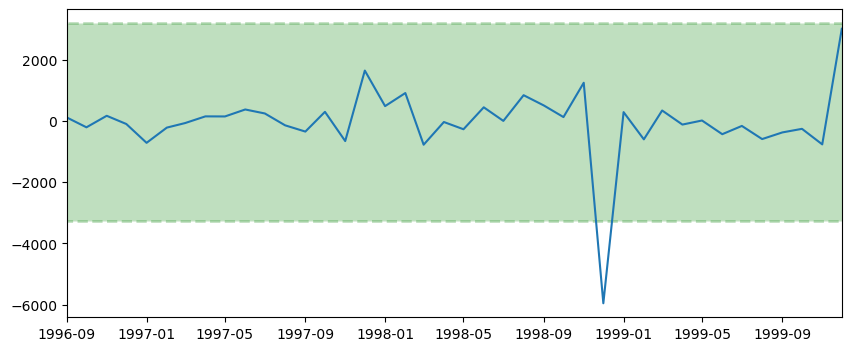

In [293]:
plt.figure(figsize=(10,4))
plt.plot(resid)

plt.fill_between([dt(1996,1,1), dt(2000,1,1)], lower, upper, color='g', alpha=0.25, linestyle='--', linewidth=2)
plt.xlim(dt(1996,9,1), dt(1999,12,1))



In [295]:
anamolies= lim_catfish_sales[(resid<lower) | (resid > upper)]

In [300]:
anamolies

,Total
Date,
1998-12-01,10000


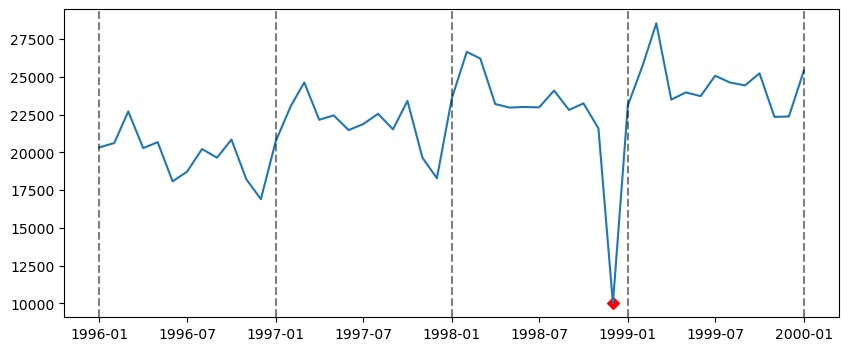

In [299]:
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales)

for year in lim_catfish_sales.index.year.unique():
    plt.axvline(dt(year,1,1), color='k', linestyle='--', alpha=0.5)
    
plt.scatter(anamolies.index, anamolies.Total, color='r', marker='D')